## First, install the package

Run ```pip install -e .``` at the proj root directory

## Pretrain the model on serveral datasets under inductive setting. 
```
bash scripts/run_small_dataset.sh $GPU_NUMBER
```

GPU_NUMBER is the index of GPU to use. For example, ```bash scripts/run_small_dataset.sh 3``` means using GPU 3 to train the models.


## Perform the edit on pretrained model.

```
bash scripts/eval.sh $GPU_NUMBER
```

## Load saved results for visualization

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import numpy as np
import os

font_config = {'font.size': 14, 'font.family': 'Times New Roman'}
plt.rcParams.update(font_config)
plt.rcParams["figure.figsize"] = (6.4, 3.2)

# datasets = ['cora', 'flickr', 'reddit2', 'arxiv', 'amazoncomputers', 
#             'amazonphoto', 'coauthorcs']

datasets = ['cora', 'amazoncomputers', 
            'amazonphoto', 'coauthorcs']
# models = ['GCN', 'SAGE']
models = ['GCN', 'SAGE']
criterion = 'wrong2correct'
# ROOT = '/home/zl105/edit_gnn/finetune_new/enn_ft'
ROOT = '/home/zl105/edit_gnn/finetune_new_std'

summary = {}
for dataset in datasets:
    summary[dataset] = {}
    for model in models:
        file_name = f'{ROOT}/{dataset}/GD/{model}_{criterion}_eval.json'
        with open(file_name, 'r') as f:
            summary[dataset][model] = json.load(f)
# print(summary)

In [19]:
fig = plt.figure()
num_datasets = len(datasets)

edit_way = 'ind_edit' # seq_edit, ind_edit, batch_edit
metric = 'success_rate' ### val_drawdown, test_drawdown

gathered_data = []
for idx, model in enumerate(models):    
    data = [summary[dataset][model][edit_way][metric] for dataset in datasets]
    gathered_data.append(data)

for idx, model in enumerate(models):
    for idx_j, dataset in enumerate(datasets):
        print(model, dataset, 'bef_edit_tst_acc', summary[dataset][model][edit_way]['bef_edit_tst_acc'] * 100)
        # print(model, dataset, f'{metric}: %.2f' % (gathered_data[idx][idx_j]))
        # print(model, dataset, '%.1f' % (summary[dataset][model][edit_way]['test_std'] * 100))

GCN cora bef_edit_tst_acc 89.4
GCN amazoncomputers bef_edit_tst_acc 87.87878787878788
GCN amazonphoto bef_edit_tst_acc 93.7745740498034
GCN coauthorcs bef_edit_tst_acc 94.36723520741208
SAGE cora bef_edit_tst_acc 86.6
SAGE amazoncomputers bef_edit_tst_acc 82.82828282828282
SAGE amazonphoto bef_edit_tst_acc 94.29882044560944
SAGE coauthorcs bef_edit_tst_acc 95.16740366392925


<Figure size 640x320 with 0 Axes>

In [17]:
fig = plt.figure()
num_datasets = len(datasets)

edit_way = 'ind_edit' # seq_edit, ind_edit, batch_edit
metric = 'test_drawdown' ### val_drawdown, test_drawdown

gathered_data = []
for idx, model in enumerate(models):    
    data = [summary[dataset][model][edit_way][metric] for dataset in datasets]
    gathered_data.append(data)

for idx, model in enumerate(models):
    for idx_j, dataset in enumerate(datasets):
        # print(model, dataset, 'bef_edit_tst_acc %.2f' % (summary[dataset][model][edit_way]['bef_edit_tst_acc'] * 100))
        print(model, dataset, 'after edit tst acc: %.2f' % (summary[dataset][model][edit_way]['bef_edit_tst_acc'] * 100 - gathered_data[idx][idx_j]) + '±%.2f' % (summary[dataset][model][edit_way]['test_std'] * 100))
        # print(model, dataset, f'{metric}: %.2f' % (gathered_data[idx][idx_j]))


GCN cora after edit tst acc: 37.16±3.80
GCN amazoncomputers after edit tst acc: 15.51±10.99
GCN amazonphoto after edit tst acc: 16.71±14.81
GCN coauthorcs after edit tst acc: 4.94±3.78
SAGE cora after edit tst acc: 33.16±1.45
SAGE amazoncomputers after edit tst acc: 16.89±16.98
SAGE amazonphoto after edit tst acc: 15.06±11.92
SAGE coauthorcs after edit tst acc: 13.71±2.73


<Figure size 640x320 with 0 Axes>

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


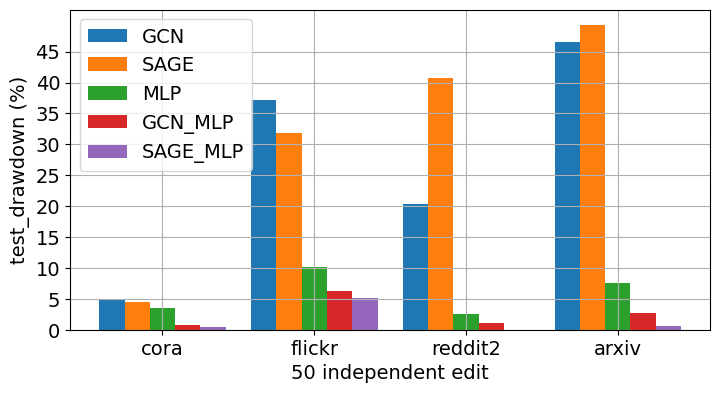

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
step_size = 1. / (len(models)+1) 
X = np.arange(num_datasets)

title_mapping = {'ind_edit': '50 independent edit', 'seq_edit': '50 sequential edit', 'batch_edit': 'batch edit with batch size 50'}
for i in range(len(models)):
    ax.bar(X + step_size * i, gathered_data[i], width = step_size)

ax.set_xticks(X + np.floor((len(models)-1)/2)* step_size)
ax.set_xticklabels(datasets)
ax.set_yticks(np.arange(0., 50., 5.))
ax.set_ylabel(f'{metric} (%)')
ax.set_xlabel(f'{title_mapping[edit_way]}')
ax.grid()
ax.legend(models)


In [4]:
len(gathered_data)

5